<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#An-investigation-of-passivity-of-common-configurations" data-toc-modified-id="An-investigation-of-passivity-of-common-configurations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>An investigation of passivity of common configurations</a></span><ul class="toc-item"><li><span><a href="#Admittance-controller" data-toc-modified-id="Admittance-controller-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Admittance controller</a></span></li><li><span><a href="#PI-controller" data-toc-modified-id="PI-controller-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>PI controller</a></span></li><li><span><a href="#Is-passivity-achievable?" data-toc-modified-id="Is-passivity-achievable?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Is passivity achievable?</a></span></li><li><span><a href="#Another-(failed)-attempt" data-toc-modified-id="Another-(failed)-attempt-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Another (failed) attempt</a></span></li><li><span><a href="#Concluding-remarks" data-toc-modified-id="Concluding-remarks-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Concluding remarks</a></span></li></ul></li><li><span><a href="#Controller-Synthesis-with-Passivity-Constraints" data-toc-modified-id="Controller-Synthesis-with-Passivity-Constraints-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Controller Synthesis with Passivity Constraints</a></span><ul class="toc-item"><li><span><a href="#The-plant" data-toc-modified-id="The-plant-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The plant</a></span></li><li><span><a href="#A-pool-of-atomic-controllers" data-toc-modified-id="A-pool-of-atomic-controllers-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>A pool of atomic controllers</a></span></li><li><span><a href="#Optimization" data-toc-modified-id="Optimization-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Optimization</a></span></li><li><span><a href="#Next-Step?" data-toc-modified-id="Next-Step?-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Next Step?</a></span></li></ul></li><li><span><a href="#A-new-approach:-Q-parametrization" data-toc-modified-id="A-new-approach:-Q-parametrization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>A new approach: Q-parametrization</a></span></li></ul></div>

This note investigates the limit a LTI controller can achieve in term of maximizing its robustness w.r.t to an exogeneous environment with widely varying stiffness.
Here, the exogeneous agent can be the free-space, or a very stiff table surface. 

Remark that if a system has passive closed-loop dynamics, then no
matter what environment is, as long as it is passive, the closed-loop
dynamics is stable. From this perscpective, the objective of this note can be: 
what is the **limits of passivity** of a system if it is controlled by a LTI controller?

Passivity, however, is not easy to achieve. For instance, even with a small
time-delay, passivity would be lost at higher frequencies, at a phase lag
that is greater than  $\pi/2$ can be found.
This fact can be seen by noting the following mathematical result, this version
given by Slotine in (Slotine, p 137)

\begin{theorem}\label{theo:fdsa}
  A strictly stable linear SISO system is passive iff
  \[\forall \omega \geq 0, \mathrm{Re}(h(j\omega)) \geq 0\]
\end{theorem}

Geometrically, this implies that the Nyquist plot lies entirely in the right-half
plane, an impossible condition if there are even a small time-delay in the control
system.

**Remarks**: Do read till the end. My lastest attempt: Q-parametrization approach
presented in Section 3 is the best looking solution (at the moment of course).



## An investigation of passivity of common configurations

Since passivity can be interpreted as the capability to remain stable regardless of the
interconnected exogeneous system. The only condition is that the exogeneous
system is passive. We can perharps formulate a  milder version of passivity
as robust stability: the closed-loop system should remain stable given that the exogeneous
system lies in a set of possible value. We will now investigate the stability 
of systems at different gain value. In particular, we will look at the Nyquist plot and see
how it changes at different gain levels.

As a running example, we consider an industrial robot doing assembly with two possible 
exogeneous systems: the free system (zero gain) and the in-contact system 
(very high gain, approximately 100000 N / m). 

<img src="img1.jpg" alt="Drawing" style="width: 400px;">

\[
R(s) = \frac{1}{1 + 0.0437 s} \frac{55.56 - s}{55.56 + s}s 
\]
and 
\[
A(s) = \frac{1}{6s^2 + 18s + 15 }
\]

The exogeneous system $H(s)$ is assumed to take the form
\[
H(s) = \frac{K}{s}, K\in [0, 1e5]
\]

In the rest of this section, we will try a few common controllers and investigate
its passivity. We will focus on the cause of im-passivity, as well as whether it is
possible to lift this issue away, creating passive industrial-robot systems.



In [107]:
import control as co
import numpy as np
import matplotlib.pyplot as plt

In [108]:
s = co.tf([1, 0], [1])
R = 1 / (1 + 0.0437 * s) * (55.56 - s) / (55.56 + s) * s

### Admittance controller
We first consider the admittance controller
\[
A(s) = \frac{1}{6s^2 + 18s + 15 }
\]


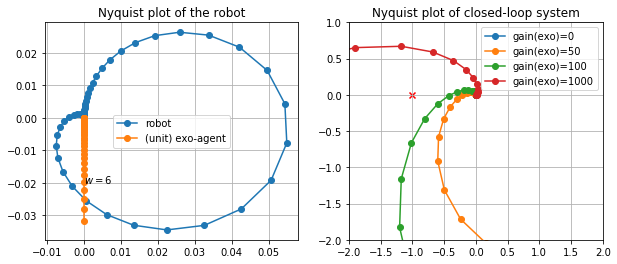

In [112]:
fig, axs = plt.subplots(1, 2, figsize=[10, 4])
A = 1 / (6 * s**2 + 18 * s + 15)
for H in [0, 50, 100, 1000]:
    # Loop gain
    L = R * A * H / s
    # nyquist plot
    mag, phase, omega = L.freqresp(np.logspace(-2, 2))
    nyquist = mag * (np.cos(phase) + 1j * np.sin(phase))
    nyquist = nyquist.flatten()
    plt.plot(nyquist.real, nyquist.imag, '-o', label='gain(exo)={:}'.format(H))
plt.scatter([-1], [0], marker='x', c='red')
plt.xlim(-2, 2)
plt.ylim(-2, 1)
plt.legend()
axs[1].set_title("Nyquist plot of closed-loop system")
plt.grid()

# nyquist plot of the robotic system without human actor
L = R * A
# nyquist plot
mag, phase, omega = L.freqresp(np.logspace(-2, 2))
nyquist = mag * (np.cos(phase) + 1j * np.sin(phase))
nyquist = nyquist.flatten()
axs[0].plot(nyquist.real, nyquist.imag, '-o', label='robot')
mag, phase, omega = (1 / s).freqresp(np.logspace(1.5, 4))
nyquist2 = mag * (np.cos(phase) + 1j * np.sin(phase))
nyquist2 = nyquist2.flatten()
axs[0].plot(nyquist2.real, nyquist2.imag, '-o', label='(unit) exo-agent')
axs[0].text(0, -0.02, "$w=6$")
axs[0].grid()
axs[0].set_title("Nyquist plot of the robot")
axs[0].legend()
plt.show()

We can give the following remarks:
1. It can be seen from the right figure that for relatively high gains (> 500), 
the Nyquist plot of the loop gain easily encircles the -1 point, indicating instability.
This is consistent with experimental results.

2. From the first figuve, we confirm that the robotic system is not passive because
there are points on its Nyquist plot that have negative real parts. Starting from $\omega$
approximately $6 rad/sec$, passivity "is lost".

Is this lost of passivity due to the admittance controller, or rather, no matter what
controller is used, the system would still be passive?

Can we make the system passive?

Before answering both questions, let us consider another controller: the PI controller.

### PI controller
We now consider a simple P controller
\[
A(s) = 0.5
\]


[]
[-36.3612357+16.3433592j -36.3612357-16.3433592j   0.        +0.j       ]
[-33.5008238+28.01407907j -33.5008238-28.01407907j
   0.        +0.j        ]
[-22.0591762+51.88335425j -22.0591762-51.88335425j
   0.        +0.j        ]


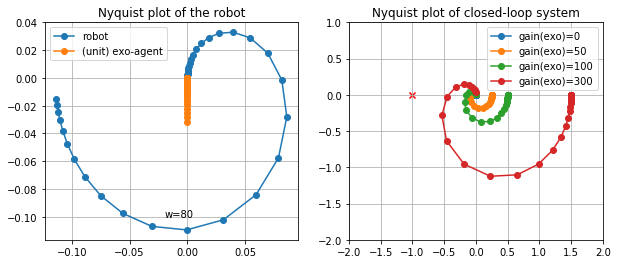

In [288]:
A = 5e-3 
fig, axs = plt.subplots(1, 2, figsize=[10, 4])
for H in [0, 50, 100, 300]:
    # Loop gain
    L = R * A * H / s
    L_cl = co.feedback(1, L, -1)
    print(co.pole(L_cl))
    # nyquist plot
    mag, phase, omega = L.freqresp(np.logspace(-4, 3))
    nyquist = mag * (np.cos(phase) + 1j * np.sin(phase))
    nyquist = nyquist.flatten()
    plt.plot(nyquist.real, nyquist.imag, '-o', label='gain(exo)={:}'.format(H))
plt.scatter([-1], [0], marker='x', c='red')
plt.xlim(-2, 2)
plt.ylim(-2, 1)
plt.legend()
axs[1].set_title("Nyquist plot of closed-loop system")
plt.grid()

# nyquist plot of the robotic system without human actor
L = R * A
# nyquist plot
mag, phase, omega = L.freqresp(np.logspace(-2, 3))
nyquist = mag * (np.cos(phase) + 1j * np.sin(phase))
nyquist = nyquist.flatten()
axs[0].plot(nyquist.real, nyquist.imag, '-o', label='robot')
axs[0].text(-0.02, -0.10, "w=80")
mag, phase, omega = (1 / s).freqresp(np.logspace(1.5, 4))
nyquist2 = mag * (np.cos(phase) + 1j * np.sin(phase))
nyquist2 = nyquist2.flatten()
axs[0].plot(nyquist2.real, nyquist2.imag, '-o', label='(unit) exo-agent')
axs[0].grid()
axs[0].set_title("Nyquist plot of the robot")
axs[0].legend()
plt.show()

- The Nyquist plot shows that the closed-loop system is not passive. After a further thought , this is not
suprise at all. The robot's transfer function has have a phase lag of $-\pi$ at very high frequencies 
(greater than 50).

- However, it is interesting to note that passivity is **lost** only at a higher frequency of 80 rad/sec.
This new value is significantly higher than for the Admittance controller. 

- Since, experimental results also show that PI controller can make contact with a stiff environemtn, unlike
admittance controller. This might
allows us to conclude that "a higher degress of passivity" is more desirable, as it allows
the robot to remain stable w.r.t to a wider range of exogeneous systems.

- But how's passive must the robot be? Using a simple stiffness-only exogenous model, 
\[
\frac{K}{j\omega}
\]
there is a fixed phase lag of $-\pi/2$. Now, at  $\omega=100, K=10000$, gain from the exogeneous
system is $100$, which implies that the crossing-gain must be less than 0.01.

### Is passivity achievable?

From the above two experiments, one might be tempted to make the conclusion that: Passivity is not achievable
if there is time-delay. More specifically, even for this simple robot model, we can't make it 
passive. 

Intuitively, this does not make sense. If such a property is so hard to etablished, ppl would not 
buy it so much, to write many papers on it.

Turn out, it is possible to make a system passive, and it is quite simple: just a lead compensator
would do. Specifcially, consider the below controller:

In [181]:
A = 5e-3 * (30 + s) / 30

The intuition is that: the phase lead allowed by this controller will help to alleviate the phase lag due to 
time-delay, making the Nyquist plot stay completely in the right half-plane.

Let's see its Nyquist plot:

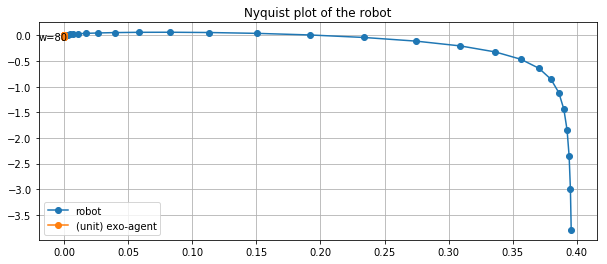

In [182]:
fig, axs = plt.subplots(1, 1, figsize=[10, 4])
# nyquist plot of the robotic system without human actor
L = R * A
# nyquist plot
mag, phase, omega = L.freqresp(np.logspace(-2, 3))
nyquist = mag * (np.cos(phase) + 1j * np.sin(phase))
nyquist = nyquist.flatten()
axs.plot(nyquist.real, nyquist.imag, '-o', label='robot')
axs.text(-0.02, -0.10, "w=80")
mag, phase, omega = (1 / s).freqresp(np.logspace(1.5, 4))
nyquist2 = mag * (np.cos(phase) + 1j * np.sin(phase))
nyquist2 = nyquist2.flatten()
axs.plot(nyquist2.real, nyquist2.imag, '-o', label='(unit) exo-agent')
axs.grid()
axs.set_title("Nyquist plot of the robot")
axs.legend()
plt.show()

Clearly the Nyquist plot stays completely in the right-half plane, and therefore, implying
that the robotic system is passive. However, this is not a good controller design because
the loop gain at high frequencies tend to infinity, leading to bad noise attenuation property.

### Another (failed) attempt
How's about this controller
\[
A = 5\times 10^{-3} (30 + s) / (30 - s)
\]

This controller brings plenty of phase lag to address passivity. At the same time, its magnitude
does not tend to infinity. This is almost too good to be true.

Indeed, some simple testings show that the closed-loop dynamics is unstable. This is because
the controller is not open-loop stable (has a pole at 30). And therefore, 
all argument regarding the Nyquist plot are invalid.

If I use a kind of automatic controller synthesis on the open loop dynamics, at least I can 
be sure that the open loop dynamics is stable. 


### Concluding remarks
- Most controllers (admittance, PI, PD) render impassive open-loop dynamics;
- However,it is possible to render passive open-loop dynamics;
- The key question is, if the system is constrained to be passive, can it still achieve other specifications?

## Controller Synthesis with Passivity Constraints

In this section, let's try to synthesize a controller that render the closed-loop dynamics when in free-space, 
or more concisely the open-loop dynamics, passive. Let's see how it fair.

More specifically, we will consider the following specifications:
- passivity
- noise attenuation
- immitation

### The plant
The 1-dof robot is re-formulated in the general LFT framework, with the following 
MIMO transfer matrix
\[
   \begin{bmatrix} v \\ m \end{bmatrix}
   = 
   \begin{bmatrix}
   0 & R(s) \\ 1 & 0
   \end{bmatrix}
   \begin{bmatrix} f \\ u \end{bmatrix}
\]
Here, $v$ is the velocity of the robot, $m$ is the measured force
$f$ is the external acting force and $u$ is the position control command.
$R(s)$ is the same as before, which is recreated below:
\[
R(s) = \frac{1}{1 + 0.0437 s} \frac{55.56 - s}{55.56 + s}s 
\]

In [201]:
# constant
dT = 0.008

In [213]:
import SLSsyn as Ss
R = s / (1 + 0.0437 * s) * (-s + 55.56) / (s + 55.56)
P = Ss.tf_blocks([[0, R], [1, 0]])
Pss = Ss.tf2ss(P, minreal=True)
Pdss = co.c2d(Pss, dT)

###  A pool of atomic controllers

Perharps the most important consideration in this step is the selction of the basis controllers.
How do we select a good set of basis controller? Is there a guiding principle that says "enough"?

Maybe one should just process forward, instead of linger for a long time over this question. Honestly, 
it does not look like there will be a good answer to this question. Lingering would just waste time.

And surely there is always the ultimate method: randomly generate many controllers and hope that it is enough.
Well, surely we can look at the cost function--the mse of the difference between final impulse response from 
a desired response--w.r.t to the number of randomized controllers.

In [240]:
import Nov14_synthesis2 as Affsyn
reload(Affsyn)
atoms = Affsyn.load_atomic_pool(Pdss)

 -- Closed-loop system STABLE. w_max=(0.9840643365786297+0.011133892098416958j)
discrete [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

 -- Closed-loop system STABLE. w_max=(0.9899409302640414+0.014684273721208924j)
discrete [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

 -- Closed-loop system STABLE. w_max=0.9918950515910929
discrete [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

 -- Closed-loop system STABLE. w_max=0.8327128937800907
discrete [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

 -- Closed-loop system UNSTABLE. w_max=1.0080320855042735 ----> Return None
-- 8/9 controllers in controllers pool are stabilizing


###  Optimization

Optimization to find an affine combination of the controllers in the atom pool.

In [281]:
import cvxpy as cvx
keys = list(atoms.keys())
m = len(atoms)

N = atoms[keys[0]].NT  # number of taps
weights = cvx.Variable(m)
constraints = [cvx.sum(weights) == 1]

# impulse response
h = 0
for i in range(m):
    h = h + weights[i] * atoms[keys[i]].H[:, 0, 0]

# Nyquist plot 
H_fft = 0
for i in range(m):
    H_fft = H_fft + weights[i] * atoms[keys[i]].H_fft[:, 0, 0]
    
# desired impulse response
m = 4; b = 14; k = 10
Tarr = np.arange(N) * dT
desired_model = co.c2d(co.tf([1, 0], [m, b, k]), dT)
_, H_desired = co.impulse_response(desired_model, Tarr, transpose=True)
H_desired = np.array(H_desired).flatten()


# noise attenuation: for w > 70 rad/s, attenuation must be less than 10e-3
w70_idx = int(70 * dT / (2 * np.pi / N))
wN_inv = np.ones(N)
wN_inv[w70_idx:] *= 1e-3

# constraints.append(cvx.abs(H_fft) <= wN_inv)
constraints.append(cvx.real(H_fft[:30]) >= 0)  # passivity
obj = cvx.Minimize(1e4 * cvx.norm(h - H_desired) + cvx.norm1(weights))

prob = cvx.Problem(obj, constraints)
prob.solve(verbose=True)
print(prob.status)

discrete [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[ 2.47627469e-02 -1.30935968e-01 -1.65509304e-05  7.43369287e-01
  3.13567366e-01 -1.25629098e-02  1.76292724e-02  4.41867559e-02]


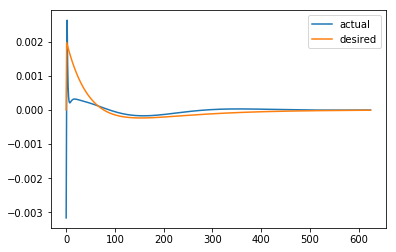

In [285]:
print(weights.value)
plt.plot(h.value, label='actual')
plt.plot(H_desired, label='desired')
plt.legend()
plt.show()

Remarks:
- The resulting controller is the zero controller. Not at all interseting. However, it might hint
that it is not possible to achieve passive dynamics

### Next Step?

Now, you have seen that Syn2 does not work perfectly. But this does not mean
that Syn1 wouldn't, or more generally, this does not mean there is no controllers that can
render the dynamics passive.

I will try to use Syn1 to synthesize a controller for this task. Look for Nov18_passive.py


## A new approach: Q-parametrization

An alternative to controller synthesis using SLS is via the Q-parametrization approach.
This is currently the most promising approach. The mathematics is elegant and well-tested. 
The optimization problem to solved is simple, and hence, promising numerically.

The central idea is that the set of output responses that are generated by a stabilizing
controller is an affine set, and is parametrized by a stable transfer matrix Q. That is, 
for any stable transfer matrix Q, there is a corresponding output response H.

In this section, I will use this method to synthesize a controller for the running problem.

Consider the same control problem. Referring to Boyd's 1990 Limit of Performance papers, 
I note that the plant have four transfer functions respectively:
\[
       P = \begin{bmatrix} P_{zw} & P_{zu} \\ P_{yw} & P_{yu} \end{bmatrix} =
       \begin{bmatrix} 0 & R(s) \\ 1 & 0 \end{bmatrix}
\]

Using $Q(s)$ to denote the Q parametrization, and note that since $P_{yu}$ is zero, $Q(s)$ is
also the controller. The output transfer function $H(s)$ is given by 
\[
  H(z) = R(z) Q(z).
\]

This remarkably simple equation should not actually be suprising.

In [406]:
R = s / (1 + 0.0437 * s)
z = co.tf([1, 0], [1], 0.008)
Rd = co.c2d(R, 0.008) / z**2

I parametrize $Q(z)$ as a FIR filter with, say 10 taps. The output mapping $H(z)$ is therefore
a linear combination of delayed impulse responses of $R(z)$

discrete [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

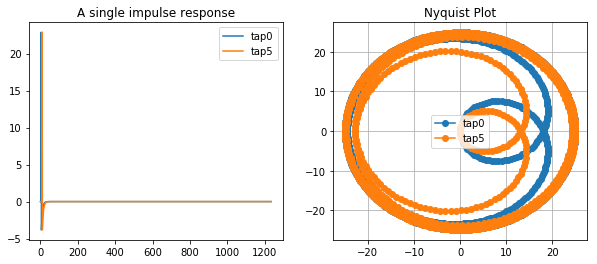

In [413]:
N = 734
Td = 500  # 100 steps
# impulse
Harr = np.zeros((N, Td + N)) # number of tap + number of step each impulse
Harr_dft = 1j * np.zeros((N, Td + N))
# compute
_, H0_ = co.impulse_response(Rd, np.arange(Td) * dT, transpose=True)
H0_[2:, 0] = H0_[:Td - 2, 0]  # shifted 2 time delay step
# H0_[0, 0] = 0  # artifact of pade-approximation
Harr[0, :Td] = H0_[:, 0]
# other taps
for i in range(1, N):
    Harr[i, i: Td + i] = H0_[:, 0]
# dft
W_dft = Ss.dft_matrix(Td + N)
for i in range(N):
    Harr_dft[i] = W_dft @ Harr[i]
# a single tap
fig, axs = plt.subplots(1, 2, figsize=[10, 4])
axs[0].plot(Harr[0], label='tap0')
axs[0].plot(Harr[5], label='tap5')
axs[0].set_title("A single impulse response")
axs[0].legend()
axs[1].plot(Harr_dft[0].real, Harr_dft[0].imag, 'o-', label='tap0')
axs[1].plot(Harr_dft[5].real, Harr_dft[5].imag, 'o-', label='tap5')
axs[1].set_title("Nyquist Plot")
axs[1].grid()
axs[1].legend()
plt.show()

discrete [1. 0. 0. ... 0. 0. 0.]


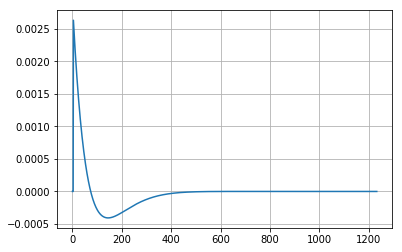

In [414]:
# the desired impulse response
sys_model = co.c2d(co.tf([1, 0], [3, 10, 10]), dT)
_, H_desired = co.impulse_response(sys_model, np.arange(Td + N) * dT, transpose=True)
H_desired = H_desired[:, 0]
H_desired[3:] = H_desired[:Td + N - 3]
H_desired[:3] = 0
plt.plot(H_desired)
plt.grid()
plt.show()



Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 4938            
  Cones                  : 1235            
  Scalar variables       : 6907            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 4938            
  Cones                  : 1235            
  Scalar variables       : 6907            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the dual        
Optimizer  - Constraints            : 1968
Optimizer  - Cones                  : 1231
Optimizer  - Scalar varia

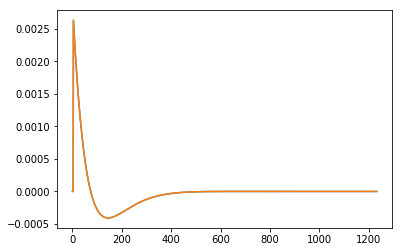

In [415]:
# optimize with cvxpy
weights = cvx.Variable(N)
weight0 = cvx.Variable()
H = weight0 * np.zeros(N + Td) * 1j
for i in range(N):
    H += weights[i] * Harr[i]
obj = cvx.norm(H - H_desired)
constraints = [cvx.sum(weights) + weight0 == 1]
prob = cvx.Problem(cvx.Minimize(obj), constraints)
prob.solve(verbose=True)


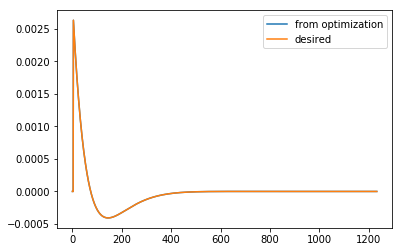

In [416]:
if prob.status == 'optimal':
    Qval = np.array(weights.value).flatten()
    plt.plot(H.value, label='from optimization')
    plt.plot(H_desired, label='desired')
    plt.legend()
    plt.show()

The two plots are identical, hence can't be distinguished.
Considering the fact that SLS-based method, SYN1, can't even solve
this simple instance (I have tried), Q parametrization-based method, SYN3, seems very promising.